Input Features: `['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'dayofweek','hour', 'pca components']` 

Target Feature: `[log1p('count')]`

PCA Training: `['temp','atemp','humidity','windspeed']`


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

In [2]:
## read the data sets
df_train = pd.read_csv("../data/rob-train_normalized.csv") 
display(df_train.head())

df_test = pd.read_csv("../data/rob-test_normalized.csv")
display(df_test.head())

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2.833213,1,0,0,1,-1.333661,-1.092737,0.993213,-1.567754,2011,1,1,5,0
1,3.713572,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,2011,1,1,5,1
2,3.496508,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,2011,1,1,5,2
3,2.639057,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,2011,1,1,5,3
4,0.693147,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,2011,1,1,5,4


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,-1.228414,-1.450292,-0.305883,1.617227,2011,1,20,3,0
1,1,0,1,1,-1.228414,-1.182421,-0.305883,-1.567754,2011,1,20,3,1
2,1,0,1,1,-1.228414,-1.182421,-0.305883,-1.567754,2011,1,20,3,2
3,1,0,1,1,-1.228414,-1.271515,-0.305883,-0.220230,2011,1,20,3,3
4,1,0,1,1,-1.228414,-1.271515,-0.305883,-0.220230,2011,1,20,3,4


In [3]:
## Find PCA to capture 90% total varition
pca = PCA(n_components=0.9) 

## Find new Features from `['temp','atemp','humidity','windspeed']`

In [4]:
columns = ['count', 'season', 'holiday', 'workingday', 'weather','year', 'month', 'day', 'dayofweek','hour']
col_for_PCA = ['temp','atemp','humidity','windspeed']
pca.fit(df_train[col_for_PCA])

PCA(n_components=0.9)

In [5]:
## No. of PCA component obtained 
print('Variance: ', pca.n_components)
print("No. of components to keep: ", pca.n_components_)

Variance:  0.9
No. of components to keep:  3


In [6]:
### Add new PCA components features and drop the ['temp','atemp','humidity','windspeed'] features

def transform_with_pca(pca, df, columns):
    transformed_data = pca.transform(df[columns])
    
    tcols = []
    for i in range(pca.n_components_):       
        tcols.append('component_' + str(i))
    
    print ('components:', tcols)
    df_transformed = pd.DataFrame(transformed_data, columns=tcols)
    
    for col in df_transformed.columns:
        df[col] = df_transformed[col]
    
    df.drop(columns, inplace=True, axis=1)
    
    return tcols

new_cols = transform_with_pca(pca, df_train, col_for_PCA)
print("New features obtained from PCA", new_cols)

transform_with_pca(pca, df_test, col_for_PCA)

components: ['component_0', 'component_1', 'component_2']
New features obtained from PCA ['component_0', 'component_1', 'component_2']
components: ['component_0', 'component_1', 'component_2']


['component_0', 'component_1', 'component_2']

In [7]:
## check train and test dataframes
display(df_train.head(3))
display(df_test.head(3))

,count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,2.833213,1,0,0,1,2011,1,1,5,0,-1.727078,-1.773606,-0.523238
1,3.713572,1,0,0,1,2011,1,1,5,1,-1.861064,-1.733926,-0.569779
2,3.496508,1,0,0,1,2011,1,1,5,2,-1.861064,-1.733926,-0.569779


,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,1,0,1,1,2011,1,20,3,0,-1.920363,1.412416,0.791086
1,1,0,1,1,2011,1,20,3,1,-1.629284,-0.856109,-1.439095
2,1,0,1,1,2011,1,20,3,2,-1.629284,-0.856109,-1.439095


In [8]:
## 
for col in new_cols:
    columns.append(col)

columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour',
 'component_0',
 'component_1',
 'component_2']

### Training and Validation Set
Training and validation files without column header

In [9]:
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df_train.index)
np.random.shuffle(l) ## shuffling the train data
df_train = df_train.loc[l]

In [10]:
## Splitting data for train and validation
rows = df_train.shape[0]
train = int(.7 * rows)
valid = rows- train
print(rows, train, valid)

10886 7620 3266


In [11]:
## check column name
col = df_train.columns.tolist()
print(col)

['count', 'season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'dayofweek', 'hour', 'component_0', 'component_1', 'component_2']


In [12]:
# Write Training Set
df_train.iloc[:train].to_csv('../data/rob_bike_train_pca.csv',
                             index=False,
                             header=False,
                             columns=columns)
# Write Validation Set
df_train.iloc[train:].to_csv('../data/rob_bike_validation_pca.csv',
                       index=False,
                       header=False,
                       columns=columns)

## check
check_train = pd.read_csv("../data/rob_bike_train_pca.csv", names=columns)
check_train.head()

,count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,4.477337,3,0,0,2,2011,9,3,5,0,1.081421,-0.937364,-0.014431
1,5.517453,3,0,1,1,2012,8,13,0,14,2.192260,0.507226,-1.412858
2,5.814131,4,0,0,1,2011,11,5,5,17,-0.667403,0.660581,-1.013002
3,6.436150,3,0,1,1,2012,8,9,3,19,2.344418,0.211416,-0.073554
4,4.262680,2,0,1,1,2011,4,14,3,6,-1.114013,-0.994734,-0.058183


In [13]:
# Test Data has only input features
df_test.to_csv('../data/rob_bike_test_pca.csv', index=True, index_label='datetime')
df_test.head()

,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,1,0,1,1,2011,1,20,3,0,-1.920363,1.412416,0.791086
1,1,0,1,1,2011,1,20,3,1,-1.629284,-0.856109,-1.439095
2,1,0,1,1,2011,1,20,3,2,-1.629284,-0.856109,-1.439095
3,1,0,1,1,2011,1,20,3,3,-1.735344,0.102855,-0.494568
4,1,0,1,1,2011,1,20,3,4,-1.735344,0.102855,-0.494568


In [14]:
print(','.join(columns))
# Write Column List
with open('../data/rob_bike_train_column_list_pca.txt','w') as f:
    f.write(','.join(columns))

count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2


## Train a model with bike rental data using PCA project with XGBoost algorithm
#### Model is trained with XGBoost installed in notebook instance

In [15]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# XGBoost 
import xgboost as xgb

In [16]:
## check for columns name
column_list_file = '../data/rob_bike_train_column_list_pca.txt'
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour',
 'component_0',
 'component_1',
 'component_2']

In [17]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv('../data/rob_bike_train_pca.csv', names=columns)
display(df_train.head())

df_validation = pd.read_csv('../data/rob_bike_validation_pca.csv', names=columns)
display(df_validation.head())

,count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,4.477337,3,0,0,2,2011,9,3,5,0,1.081421,-0.937364,-0.014431
1,5.517453,3,0,1,1,2012,8,13,0,14,2.192260,0.507226,-1.412858
2,5.814131,4,0,0,1,2011,11,5,5,17,-0.667403,0.660581,-1.013002
3,6.436150,3,0,1,1,2012,8,9,3,19,2.344418,0.211416,-0.073554
4,4.262680,2,0,1,1,2011,4,14,3,6,-1.114013,-0.994734,-0.058183


,count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,6.095825,3,0,1,2,2011,7,7,3,8,1.511799,-0.648078,0.755707
1,5.961005,2,0,0,1,2011,6,11,5,13,2.344418,0.211416,-0.073554
2,1.098612,1,0,1,1,2011,2,14,0,2,-1.029108,1.454607,-0.258043
3,3.891820,1,0,1,1,2011,2,8,1,10,-2.270060,2.706229,1.384771
4,4.025352,4,0,0,1,2011,12,4,6,8,-1.610871,-1.996173,-0.293018


In [18]:
## Preparing Independent features and dependent feature
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

## XGBoost accepts target variable in first column

C:\Users\yrobi\AppData\Local\Temp\ipykernel_24976\3285263807.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = df_train.iloc[:,0].ravel() # Target: 0th column
C:\Users\yrobi\AppData\Local\Temp\ipykernel_24976\3285263807.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_validation = df_validation.iloc[:,0].ravel()


In [19]:
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
#regressor = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=150)
regressor = xgb.XGBRegressor(max_depth=5, n_estimators=150)
regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
## Aprroximation target variable by training on train data
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)]);

[0]	validation_0-rmse:1.09551	validation_1-rmse:1.07068
[1]	validation_0-rmse:0.86942	validation_1-rmse:0.85130
[2]	validation_0-rmse:0.71910	validation_1-rmse:0.70777
[3]	validation_0-rmse:0.61339	validation_1-rmse:0.60835
[4]	validation_0-rmse:0.54540	validation_1-rmse:0.54719
[5]	validation_0-rmse:0.49188	validation_1-rmse:0.49559
[6]	validation_0-rmse:0.45616	validation_1-rmse:0.46412
[7]	validation_0-rmse:0.41757	validation_1-rmse:0.43050
[8]	validation_0-rmse:0.39292	validation_1-rmse:0.41025
[9]	validation_0-rmse:0.37507	validation_1-rmse:0.39438
[10]	validation_0-rmse:0.36206	validation_1-rmse:0.38401
[11]	validation_0-rmse:0.35389	validation_1-rmse:0.37772
[12]	validation_0-rmse:0.34791	validation_1-rmse:0.37322
[13]	validation_0-rmse:0.32632	validation_1-rmse:0.35451
[14]	validation_0-rmse:0.32078	validation_1-rmse:0.35084
[15]	validation_0-rmse:0.31561	validation_1-rmse:0.34783
[16]	validation_0-rmse:0.30028	validation_1-rmse:0.33360
[17]	validation_0-rmse:0.29739	validation

In [21]:

## Summary statistics of target variable
df_train['count'].describe()

count    7620.000000
mean        4.583886
std         1.429959
min         0.693147
25%         3.737670
50%         4.976734
75%         5.652489
max         6.885510
Name: count, dtype: float64

In [22]:
## Result after training on train set
eval_result = regressor.evals_result()
# print(eval_result)

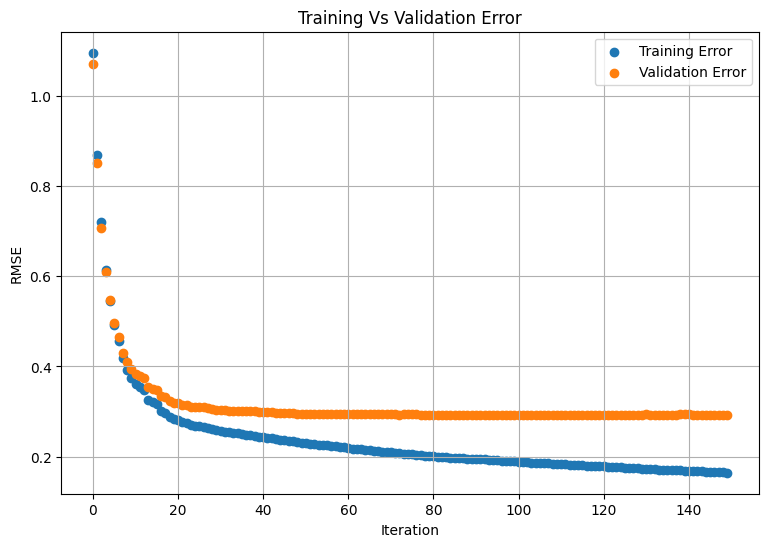

In [23]:
### Plotting "training error" vs. "validation error" -- to check model performance
## No.of Iterations
training_rounds = range(len(eval_result['validation_0']['rmse']))

## plot
plt.figure(figsize=(9,6))
plt.scatter(x=training_rounds, y=eval_result['validation_0']['rmse'], label='Training Error')
plt.scatter(x=training_rounds, y=eval_result['validation_1']['rmse'], label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

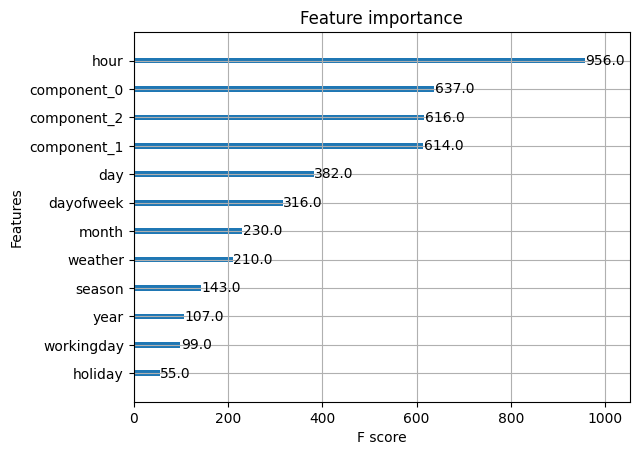

In [24]:
## Feature importance
xgb.plot_importance(regressor)
plt.show()

## Note: "hour is the most important features", also 
# "component_0", "component_1", , "component_2", "day" plays important role

### Prediction validation dataset --- test for this case

In [25]:
# Updated - Changed to validation dataset
# Compare actual vs predicted performance with dataset not seen by the model before
df_test = pd.read_csv("../data/rob_bike_validation_pca.csv", names=columns)
df_test.head()

,count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,6.095825,3,0,1,2,2011,7,7,3,8,1.511799,-0.648078,0.755707
1,5.961005,2,0,0,1,2011,6,11,5,13,2.344418,0.211416,-0.073554
2,1.098612,1,0,1,1,2011,2,14,0,2,-1.029108,1.454607,-0.258043
3,3.891820,1,0,1,1,2011,2,8,1,10,-2.270060,2.706229,1.384771
4,4.025352,4,0,0,1,2011,12,4,6,8,-1.610871,-1.996173,-0.293018


In [26]:
## Input features from validation dataset 
# 
X_test = df_test.iloc[:,1:] ## This features will be feed into trained model to predict bike rental count
X_test.head()

,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,3,0,1,2,2011,7,7,3,8,1.511799,-0.648078,0.755707
1,2,0,0,1,2011,6,11,5,13,2.344418,0.211416,-0.073554
2,1,0,1,1,2011,2,14,0,2,-1.029108,1.454607,-0.258043
3,1,0,1,1,2011,2,8,1,10,-2.270060,2.706229,1.384771
4,4,0,0,1,2011,12,4,6,8,-1.610871,-1.996173,-0.293018


In [27]:
## Prediction on test data
result = regressor.predict(X_test)
result[:5]

array([5.9971   , 5.990073 , 1.6193914, 3.889477 , 4.425002 ],
      dtype=float32)

In [28]:
## Let's add predicted count column to the test dataframe
df_test['pred_count'] = result

## check test data now
df_test.head()

,count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2,pred_count
0,6.095825,3,0,1,2,2011,7,7,3,8,1.511799,-0.648078,0.755707,5.997100
1,5.961005,2,0,0,1,2011,6,11,5,13,2.344418,0.211416,-0.073554,5.990073
2,1.098612,1,0,1,1,2011,2,14,0,2,-1.029108,1.454607,-0.258043,1.619391
3,3.891820,1,0,1,1,2011,2,8,1,10,-2.270060,2.706229,1.384771,3.889477
4,4.025352,4,0,0,1,2011,12,4,6,8,-1.610871,-1.996173,-0.293018,4.425002


In [29]:
## Inverse the log transformation to get the exact bike rental
df_test['count'] = df_test['count'].map(np.expm1)
df_test['pred_count'] = df_test['pred_count'].map(np.expm1)

In [30]:

# Summary Statistics of predicted bike rental counts
df_test['pred_count'].describe()

count    3266.000000
mean      187.884438
std       175.393443
min         0.845885
25%        43.860660
50%       146.089930
75%       275.936713
max       958.818344
Name: pred_count, dtype: float64

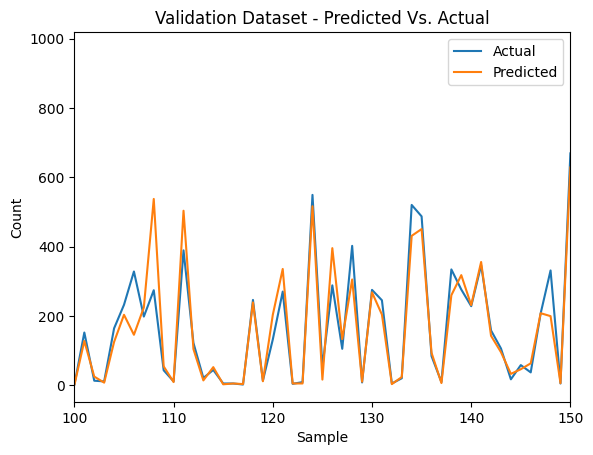

In [31]:
# Actual Vs Predicted
plt.plot(df_test['count'], label='Actual')
plt.plot(df_test['pred_count'],label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Count')
plt.xlim([100,150])
plt.title('Validation Dataset - Predicted Vs. Actual')
plt.legend()
plt.show()

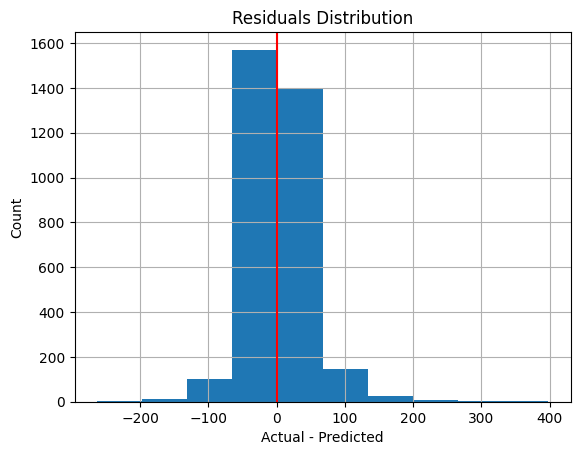

In [32]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df_test['count'] - df_test['pred_count'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='r')
plt.show()

In [33]:
value_counts = (residuals > 0).value_counts(sort=False)
print(' Under Estimation: {0:.2f}'.format(value_counts[True]/len(residuals)))
print(' Over  Estimation: {0:.2f}'.format(value_counts[False]/len(residuals)))

 Under Estimation: 0.52
 Over  Estimation: 0.48


In [34]:
### Model Evaluation
import sklearn.metrics as metrics
print("RMSE: {0:.2f}".format(metrics.mean_squared_error(df_test['count'],
                                                    df_test['pred_count'])**.5))

RMSE: 42.43


In [35]:
# Metric Use By Kaggle
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

print("RMSLE: {0:.2f}".format(compute_rmsle(df_test['count'], df_test['pred_count'])))

RMSLE: 0.29


### Prepare Data for Submission to Kaggle

In [36]:
# Prepare Data for Submission to Kaggle
df_org_test = pd.read_csv("../data/rob_bike_test_pca.csv", parse_dates=['datetime'])
df_org_test.head()

C:\Users\yrobi\AppData\Local\Temp\ipykernel_24976\283912238.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_org_test = pd.read_csv("../data/rob_bike_test_pca.csv", parse_dates=['datetime'])


,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,0,1,0,1,1,2011,1,20,3,0,-1.920363,1.412416,0.791086
1,1,1,0,1,1,2011,1,20,3,1,-1.629284,-0.856109,-1.439095
2,2,1,0,1,1,2011,1,20,3,2,-1.629284,-0.856109,-1.439095
3,3,1,0,1,1,2011,1,20,3,3,-1.735344,0.102855,-0.494568
4,4,1,0,1,1,2011,1,20,3,4,-1.735344,0.102855,-0.494568


In [37]:
test_X =  df_org_test.iloc[:,1:] # Exclude datetime for prediction
test_X.head()

,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,1,0,1,1,2011,1,20,3,0,-1.920363,1.412416,0.791086
1,1,0,1,1,2011,1,20,3,1,-1.629284,-0.856109,-1.439095
2,1,0,1,1,2011,1,20,3,2,-1.629284,-0.856109,-1.439095
3,1,0,1,1,2011,1,20,3,3,-1.735344,0.102855,-0.494568
4,1,0,1,1,2011,1,20,3,4,-1.735344,0.102855,-0.494568


In [38]:
## Prediction original test data
result = regressor.predict(test_X)
print(result[:5])

## Inverse the log transformation
np.expm1(result)

[1.9707661  1.9281065  1.4611969  1.0490031  0.85209644]


array([  6.176172 ,   5.8764777,   3.3111162, ..., 133.15149  ,
        73.93084  ,  47.037483 ], dtype=float32)

In [39]:
# Convert result to actual count
df_org_test["count"] = np.expm1(result)
df_org_test.head()

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2,count
0,0,1,0,1,1,2011,1,20,3,0,-1.920363,1.412416,0.791086,6.176172
1,1,1,0,1,1,2011,1,20,3,1,-1.629284,-0.856109,-1.439095,5.876478
2,2,1,0,1,1,2011,1,20,3,2,-1.629284,-0.856109,-1.439095,3.311116
3,3,1,0,1,1,2011,1,20,3,3,-1.735344,0.102855,-0.494568,1.854804
4,4,1,0,1,1,2011,1,20,3,4,-1.735344,0.102855,-0.494568,1.344557


In [40]:

## check if count is less than 0-- which is not possible in real life
df_org_test[df_org_test["count"] < 0]

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2,count


In [41]:
df_org_test[['datetime','count']].to_csv('../data/predicted_count_pca.csv',index=False)

In [42]:

sub = pd.read_csv("../data/predicted_count_pca.csv")
sub.head()

,datetime,count
0,0,6.176172
1,1,5.876478
2,2,3.311116
3,3,1.854804
4,4,1.344557
